In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

In [36]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


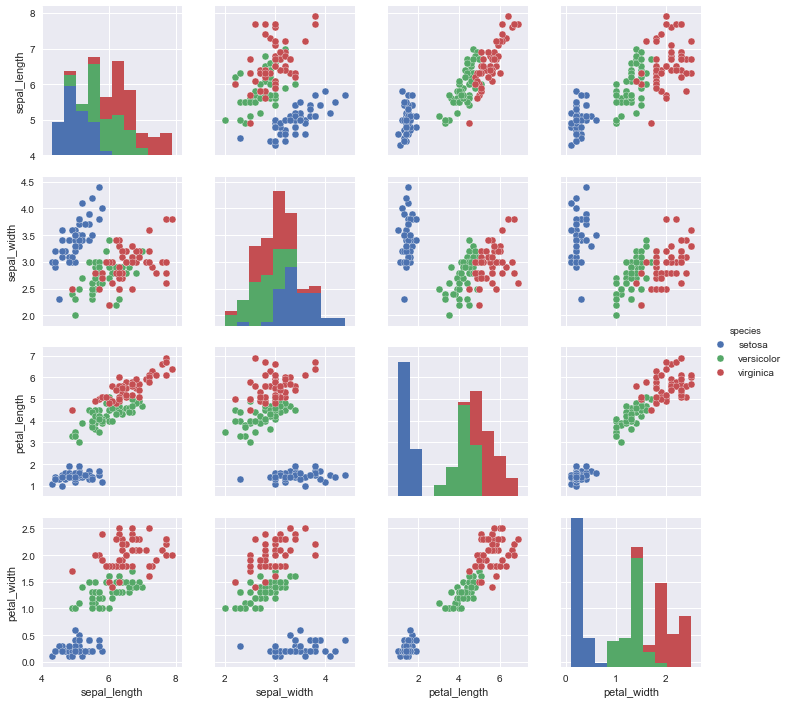

In [37]:
sns.pairplot(iris, hue='species');

In [38]:
X = iris.values[:, :4]
y = iris.values[:, 4]

In [39]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

In [40]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [41]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.83


In [44]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

In [45]:
model = Sequential()

In [46]:
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

In [47]:
model.add(Dense(3))
model.add(Activation('softmax'))

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [49]:
model.fit(train_X, train_y_ohe, nb_epoch=100, batch_size=1, verbose=0);

/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [50]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.99


In [51]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170467328/170498071 [============================>.] - ETA: 0s

In [52]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11444224/11490434 [============================>.] - ETA: 0s

In [53]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


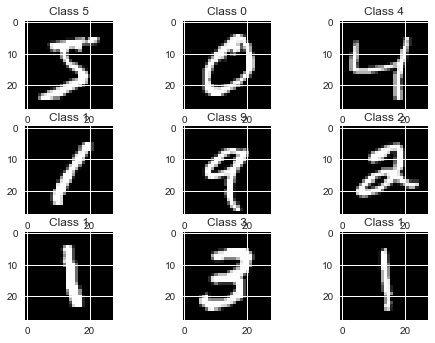

In [54]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [55]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [57]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [61]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [66]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          verbose=1,
          validation_data=(X_test, Y_test))

model.fit

/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 11s - loss: 0.2496 - val_loss: 0.1126
Epoch 2/4
60000/60000 [==============================] - 10s - loss: 0.1003 - val_loss: 0.0832
Epoch 3/4
60000/60000 [==============================] - 10s - loss: 0.0708 - val_loss: 0.0721
Epoch 4/4
60000/60000 [==============================] - 10s - loss: 0.0577 - val_loss: 0.0739


<bound method Sequential.fit of <keras.models.Sequential object at 0x12448d550>>

In [70]:
score = model.evaluate(X_test, Y_test,
                       verbose=0)
# accuracy = model.accuracy(X_test, Y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])
print('Test score:', score)
print('Test accuracy:', )

Test score: 0.0738729837538


AttributeError: 'Sequential' object has no attribute 'accuracy'

In [71]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9408/10000 [===========================>..] - ETA: 0s

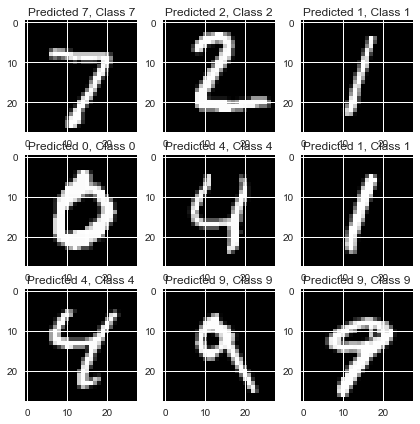

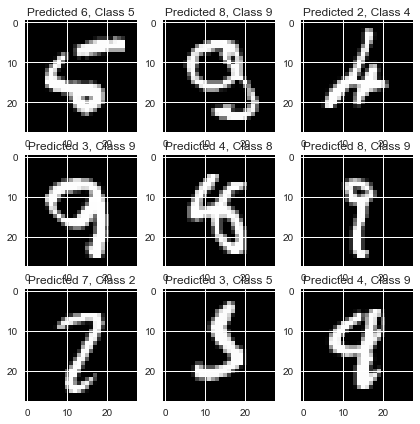

In [72]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

In [73]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [74]:
print(X_train.shape)

(60000, 28, 28)


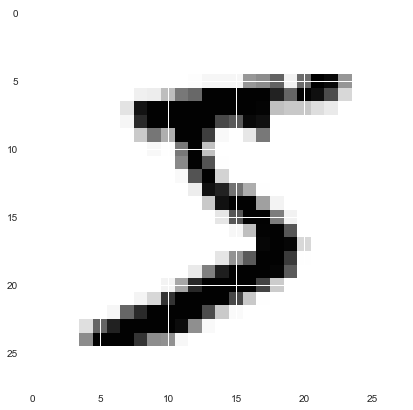

In [75]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [77]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [78]:
print(X_train.shape)
# (60000, 1, 28, 28)

(60000, 1, 28, 28)


In [79]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [80]:
print(y_train.shape)
# (60000,)

(60000,)


In [81]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]
